In [5]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
from pathlib import Path
import sys
sys.path.append('../src')
from charting.chart_seasonality import (chart_monthly_seasonality,
                                        backtest,
                                        calc_monthly_rtns)
from utils.get_prices import get_prices
from utils.load_bucket_prices import load_bucket_prices
from IPython.display import clear_output


DATA_PATH = Path('../data')
DATA_PATH_BASKETS = DATA_PATH / 'baskets'
DATA_PATH_RAW = DATA_PATH / 'raw'
DATA_PATH_PROCESSED = DATA_PATH / 'processed'
OUTPUT_PATH = Path('../reports/charts')


def _shift_date(date_str, offset, unit='D'):
    date = pd.to_datetime(date_str)
    date += pd.to_timedelta(offset, unit=unit)
    return date.strftime('%Y-%m-%d')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
filename = 'R_prc_cl_scorecard_single_ticker_1980-01-01_2021-06-22_T.csv'
filepath = DATA_PATH_RAW / filename
prc_tiingo = pd.read_csv(filepath, index_col=0, parse_dates=True)


## Backtest: Trade with monthly seasonality signals
Compare cumulative return and monthly return stats with buy&hold

,Seasonality,Buy & Hold
count,246.000000,246.000000
mean,0.006931,0.007303
std,0.037206,0.043117
min,-0.124643,-0.165187
25%,-0.006490,-0.014433
50%,0.004823,0.012359
75%,0.027722,0.032208
max,0.126984,0.126984
sharpe,0.186287,0.169364


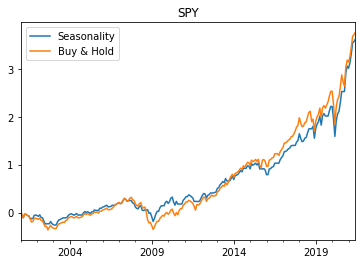

In [9]:
tk = 'SPY'
# prices = get_prices(tk, '1980-01-01', '2021-06-22')['adj_close']
prices = prc_tiingo.loc[:, tk].dropna()
rtns_seasn = backtest(prices,
                      lookback=8, holding=1,
                      signal_metric='return',
                      n_exclude=2,
                      threshold=None)
rtns_bnh = calc_monthly_rtns(prices).loc[rtns_seasn.index]

df = pd.concat([rtns_seasn, rtns_bnh], axis=1)
df.columns = ['Seasonality', 'Buy & Hold']
df_cum = (1 + df).cumprod() - 1
df_cum.plot(title=tk)

summary = df.describe()
summary.loc['sharpe', :] = summary.loc['mean'] / summary.loc['std']
summary

## Chart Seasonality: Avg Monthly Rtn & Hit Rate

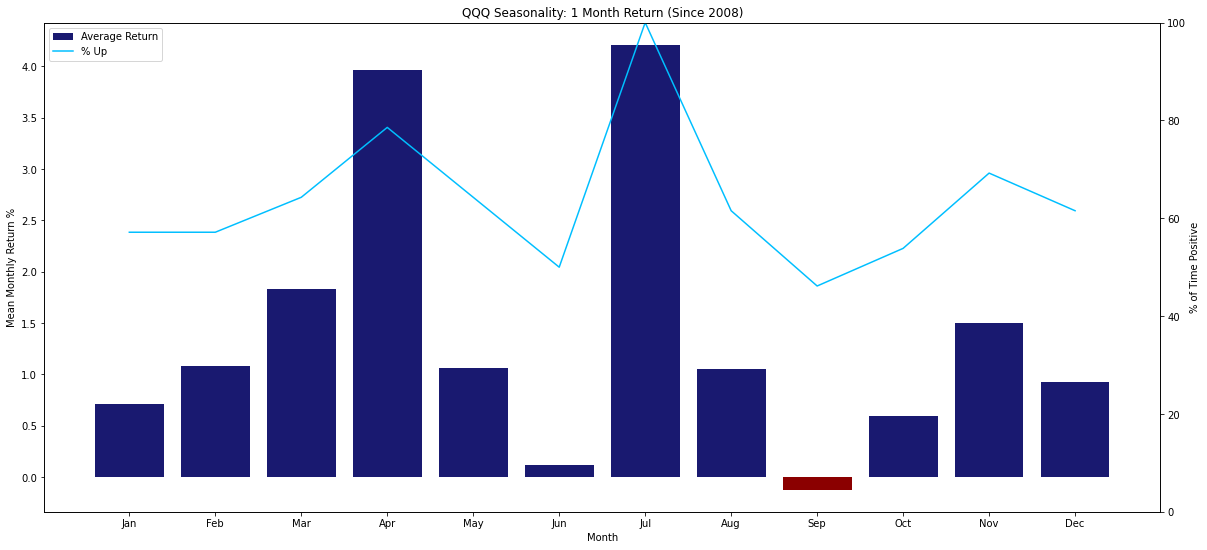

In [13]:
chart_monthly_seasonality(prc_tiingo.loc['2008-01-01':, 'QQQ'],
                          '../reports/charts/a.jpg')

## Chart Seasonality: Cum Avg